In [1]:
import pandas as pd

In [15]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
ls

AMiner-Author.txt    centrality_results.txt  jaffa/        output2.txt
AMiner-Coauthor.txt  cleaning.ipynb          layers.ipynb  output3.txt
AMiner-Paper.txt     coauthor.csv            new.ipynb     your_output_file.csv
author.csv           fullpaper.csv           output1.txt


In [2]:
paper_data = "fullpaper.csv"


author_data = "author.csv"

coauth_data = "coauthor.csv"

In [3]:
# Plot multi-graphs in 3D
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Line3DCollection

## Reading CSV and convertingto DataFrame

In [4]:
auth_df = pd.read_csv(author_data)
fullpaper_df = pd.read_csv(paper_data)

# Author Network

In [5]:
fullpaper_df.tail()

,Unnamed: 0,Index,Paper Title,Authors,Afflications,Year,Venue,Idref,abstract
64953,64953,308469,Beyond document similarity: understanding val...,Junghoo Cho,Stanford University;Stanford University;Unive...,2000,ACM SIGMOD Record,0,"In the face of small, one or two word queries..."
64954,64954,308469,Beyond document similarity: understanding val...,Hector Garcia-Molina,Stanford University;Stanford University;Unive...,2000,ACM SIGMOD Record,0,"In the face of small, one or two word queries..."
64955,64955,308469,Beyond document similarity: understanding val...,Andreas Paepcke,Stanford University;Stanford University;Unive...,2000,ACM SIGMOD Record,0,"In the face of small, one or two word queries..."
64956,64956,308470,Displaced subdivision surfaces,Hugues Hoppe,"Department of Computer Science, Princeton Uni...",2000,Proceedings of the 27th annual conference on ...,"[31714, 76764, 149125, 173240, 196917, 196963,...",In this paper we introduce a new surface repr...
64957,64957,308470,Displaced subdivision surfaces,Henry Moreton,"Department of Computer Science, Princeton Uni...",2000,Proceedings of the 27th annual conference on ...,"[31714, 76764, 149125, 173240, 196917, 196963,...",In this paper we introduce a new surface repr...


In [6]:
auth_df.head()

,Unnamed: 0,AuthorId,Author Name,Paper Publications,Afflications,Citation Count,H Index,Paper of interests
0,0,8,Chih-Yung Wen,3,"National ChengKung University, Department of A...",1,1,diaphragm deflection;magnetic force;flexible P...
1,1,10,Anon et al,47,"Wayne State University;Anonymous, USA;A Commer...",67,3,security consultant;network security;security ...
2,2,13,Kimberly Weaver,9,Iowa State University;Georgia Institute of Tec...,14,2,sign language;hearing parent;deaf child;langua...
3,3,15,IEEE Region 7,16,Department of Computer Science and Engineering...,35,3,Visual Language;different space;topological va...
4,4,21,P. R. White,9,"ISVR, University of Southampton, Southampton, ...",18,3,successive speech frame;speech enhancement alg...


In [7]:
print(auth_df.iloc[0][2])

Chih-Yung Wen


In [22]:
print(auth_df['Afflications'].isnull().sum())


1


In [25]:
k = "Dept. of Precision Instrum. & Mechanology, Tsinghua Univ., Beijing, China"
mask = auth_df['Afflications'].dropna().str.contains(k)
auth_df[mask.reindex(auth_df.index, fill_value=False)]


,Unnamed: 0,AuthorId,Author Name,Paper Publications,Afflications,Citation Count,H Index,Paper of interests
420659,420659,1339682,C. Herrmann,1,"Dept. of Precision Instrum. & Mechanology, Tsi...",1,1,environmental performance indicator;entire lif...
447012,447012,1421881,D. A. Dickinson,4,"MultiLifecycle Eng. Res. Center, New Jersey In...",1,1,environmental impact;supply line sustainabilit...
450344,450344,1432768,N. Gallon,1,"Dept. of Precision Instrum. & Mechanology, Tsi...",1,1,environmental performance indicator;entire lif...
528136,528136,1697555,R. J. Caudill,5,"MultiLifecycle Eng. Res. Center, New Jersey In...",3,1,environmental impact;economic value;supply lin...


In [8]:
auth_nx = nx.Graph()
for i in range(1,1250):
  auth_nx.add_node(i,name = auth_df.iloc[i][2])

In [9]:
auth_nx.nodes()

NodeView((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220

## Filtering Paper DataFrame with user input

In [10]:
user_ip = "Circuit simulation"
paper_df = fullpaper_df[fullpaper_df['Paper Title'].str.contains(user_ip.lower())]
paper_df.head()

,Unnamed: 0,Index,Paper Title,Authors,Afflications,Year,Venue,Idref,abstract
5185,5185,32152,A vector hardware accelerator with circuit si...,M. Katevenis,"Daisy Systems Corporation, 700 Middlefield Ro...",1987,DAC '87 Proceedings of the 24th ACM/IEEE Desi...,"[193880, 605138]",A floating-point vector accelerator has been ...
5186,5186,32152,A vector hardware accelerator with circuit si...,D. Weiss,"Daisy Systems Corporation, 700 Middlefield Ro...",1987,DAC '87 Proceedings of the 24th ACM/IEEE Desi...,"[193880, 605138]",A floating-point vector accelerator has been ...
5187,5187,32152,A vector hardware accelerator with circuit si...,A. Vladimirescu,"Daisy Systems Corporation, 700 Middlefield Ro...",1987,DAC '87 Proceedings of the 24th ACM/IEEE Desi...,"[193880, 605138]",A floating-point vector accelerator has been ...
5188,5188,32152,A vector hardware accelerator with circuit si...,N. Jain,"Daisy Systems Corporation, 700 Middlefield Ro...",1987,DAC '87 Proceedings of the 24th ACM/IEEE Desi...,"[193880, 605138]",A floating-point vector accelerator has been ...
8028,8028,47817,Parallelization and performance evaluation of...,V. Visvanathan,"Ohio State Univ., Columbus;AT&T Bell Laborato...",1988,ICS '88 Proceedings of the 2nd international ...,"[7941, 7950, 289402, 407705, 426454]",Circuit simulation is a widely used but compu...


In [11]:
len(paper_df)

30

# Paper Network

In [12]:
paper_df.head()

,Unnamed: 0,Index,Paper Title,Authors,Afflications,Year,Venue,Idref,abstract
5185,5185,32152,A vector hardware accelerator with circuit si...,M. Katevenis,"Daisy Systems Corporation, 700 Middlefield Ro...",1987,DAC '87 Proceedings of the 24th ACM/IEEE Desi...,"[193880, 605138]",A floating-point vector accelerator has been ...
5186,5186,32152,A vector hardware accelerator with circuit si...,D. Weiss,"Daisy Systems Corporation, 700 Middlefield Ro...",1987,DAC '87 Proceedings of the 24th ACM/IEEE Desi...,"[193880, 605138]",A floating-point vector accelerator has been ...
5187,5187,32152,A vector hardware accelerator with circuit si...,A. Vladimirescu,"Daisy Systems Corporation, 700 Middlefield Ro...",1987,DAC '87 Proceedings of the 24th ACM/IEEE Desi...,"[193880, 605138]",A floating-point vector accelerator has been ...
5188,5188,32152,A vector hardware accelerator with circuit si...,N. Jain,"Daisy Systems Corporation, 700 Middlefield Ro...",1987,DAC '87 Proceedings of the 24th ACM/IEEE Desi...,"[193880, 605138]",A floating-point vector accelerator has been ...
8028,8028,47817,Parallelization and performance evaluation of...,V. Visvanathan,"Ohio State Univ., Columbus;AT&T Bell Laborato...",1988,ICS '88 Proceedings of the 2nd international ...,"[7941, 7950, 289402, 407705, 426454]",Circuit simulation is a widely used but compu...


In [13]:

paper_nx = nx.Graph()
for i in range(len(paper_df)):
  if paper_df.iloc[i][3] !=' ':
    paper_nx.add_node(paper_df.iloc[i][1], name = list(paper_df.iloc[i][3].split(";")),year =paper_df.iloc[i][5],ref = paper_df.iloc[i][7] )

In [14]:
paper_nx.nodes()

NodeView((32152, 47817, 65040, 65041, 65146, 109610, 164356, 193305, 202877, 215038, 236016, 285573, 301919))

# Years Network

In [15]:
len(paper_df)

30

In [32]:
# year_nx.clear()

In [16]:
year_nx = nx.Graph()
for i in range(len(paper_df)):
  if paper_df.iloc[0][5] !=' ':
    year_nx.add_node(paper_df.iloc[i][5],year =paper_df.iloc[i][5],name = paper_df.iloc[i][5])

In [16]:
year_nx.nodes()

NodeView((1987, 1988, 1989, 1991, 1994, 1995, 1996, 1997, 2000))

## Creating a coauthor DataFrame

In [17]:
coauth_df = pd.read_csv(coauth_data)

In [18]:
coauth_df

,Unnamed: 0,Index of Author,Index of Co-author,Number of Collaborations between them
0,0,52232.0,1034146,1
1,1,68881.0,947067,2
2,2,132922.0,1140429,1
3,3,121865.0,1244844,2
4,4,11714.0,364153,2
...,...,...,...,...
2336630,2336630,105636.0,954873,2
2336631,2336631,121915.0,345938,3
2336632,2336632,102884.0,817549,1
2336633,2336633,103634.0,1679305,1


## Plotting the Multilayer Network

In [21]:
class GraphLayers:
    def __init__(self, graphs, node_labels=None, layout=nx.spring_layout, ax=None):
        """
        Initialize a GraphLayers object.

        Args:
            graphs (list of networkx.Graph): A list of graphs representing the layers.
            node_labels (dict or None): A dictionary mapping node IDs to labels, or None if no labels are given.
            layout (function): A function used to compute the node positions.
            ax (matplotlib.axes.Axes or None): The axes where to draw the graph, or None to create a new 3D axes.

        Attributes:
            graphs (list of networkx.Graph): A list of graphs representing the layers.
            total_layers (int): The number of layers.
            node_labels (dict or None): A dictionary mapping node IDs to labels, or None if no labels are given.
            layout (function): A function used to compute the node positions.
            ax (matplotlib.axes.Axes): The axes where to draw the graph.
            nodes (list of tuples): An internal representation of nodes with the format (node ID, layer).
            edges_within_layers (list of tuples): A list of edges in the individual layers mapped to the internal representation of the node IDs.
            edges_between_layers (list of tuples): A list of edges connecting nodes between adjacent layers.

        """
        # book-keeping
        self.graphs = graphs
        self.total_layers = len(graphs)
        self.node_labels = node_labels
        self.layout = layout

        if ax is not None:
            self.ax = ax
        else:
            fig = plt.figure()
            self.ax = fig.add_subplot(111, projection='3d')

        # create internal representation of nodes and edges
        self.get_nodes()
        self.get_edges_within_layers()
        self.get_edges_between_layers()

        # compute layout and plot
        self.get_node_positions()
        self.draw()

    def get_nodes(self):
        """
        Construct an internal representation of nodes with the format (node ID, layer).
        """
        self.nodes = []
        for layer, graph in enumerate(self.graphs):
            self.nodes.extend([(node, layer) for node in graph.nodes()])

    def get_edges_within_layers(self):
        """
        Remap edges in the individual layers to the internal representations of the node IDs.
        """
        self.edges_within_layers = []
        paper_paper_edges = []
        for layer, graph in enumerate(self.graphs):
            if layer == 1:
                # add paper-paper edges based on the 'ref' attribute
                paper_node_attr = nx.get_node_attributes(graph, 'ref')
                paper_list = list(paper_node_attr.keys())
                p_v_list = list(paper_node_attr.values())
                for indx, x in enumerate(p_v_list):
                    if x != '0':
                        y = x[1:-1].split(',')
                        for ref_p in y:
                            pos = p_v_list.index(x)
                            if int(ref_p) in graph.nodes():
                                paper_paper_edges.append(((paper_list[pos], layer), (int(ref_p), layer)))
            else:
                self.edges_within_layers.extend([((source, layer), (target, layer)) for source, target in graph.edges()])

        # add paper-paper edges to the list of within-layer edges
        self.edges_within_layers.extend(paper_paper_edges)



    def get_edges_between_layers(self):
    """Determine edges between layers. Nodes in subsequent layers are
    thought to be connected if they have the same ID."""
    self.edges_between_layers = []
    layered_edges = []
    p_y_edges = []
    for z1, g in enumerate(self.graphs[:-1]):
        z2 = z1 + 1
        h = self.graphs[z2]
        shared_nodes = set(g.nodes()) & set(h.nodes())
        if z1 == 0:
            paper_node_attr = nx.get_node_attributes(paper_nx, 'name')
            author_node_attr = nx.get_node_attributes(auth_nx, 'name')
            key_list = list(author_node_attr.keys())
            val_list = list(author_node_attr.values())
            for i in paper_node_attr.items():
                for x in i[1]:
                    found_ath = x.strip() in val_list
                    if found_ath == True:
                        pos = val_list.index(x.strip())
                        layered_edges.append(((key_list[pos], z1), (i[0], z2)))
            self.edges_between_layers.extend(layered_edges)
        if z1 == 1:
            paper_node_attr = nx.get_node_attributes(paper_nx, 'year')
            year_node_attr = nx.get_node_attributes(year_nx, 'year')
            year_list = list(year_node_attr.values())
            for sngpaper in paper_node_attr.items():
                if sngpaper[1] in year_list:
                    pos = year_list.index(sngpaper[1])
                    p_y_edges.append(((sngpaper[0], z1), (year_list[pos], z2)))
            self.edges_between_layers.extend(p_y_edges)



def get_node_positions(self, *args, **kwargs):
    """Get the node positions in the layered layout."""
    # Compute the layout for the full network in 2D.
    composition = nx.compose_all(self.graphs)
    pos = self.layout(composition, *args, **kwargs)

    # Apply the positions to the nodes in all planes.
    self.node_positions = dict()
    for z, g in enumerate(self.graphs):
        for node in g.nodes():
            x, y = pos[node]
            self.node_positions[(node, z)] = (x, y, z)



def draw_nodes(self, nodes, *args, **kwargs):
    positions = [self.node_positions[node] for node in nodes]
    x, y, z = zip(*positions)
    self.ax.scatter(x, y, z, *args, **kwargs)



    def draw_edges(self, edges, color='black', linewidth=1, alpha=1.0):
    """
    Draw edges between nodes in the layered network plot.
    """
    segments = []
    for source, target in edges:
        start_pos = self.node_positions[source]
        end_pos = self.node_positions[target]
        segments.append([start_pos, end_pos])

    line_collection = mpl_toolkits.mplot3d.art3d.Line3DCollection(
        segments, color=color, linewidth=linewidth, alpha=alpha
    )

    self.ax.add_collection3d(line_collection)



def get_extent(self, pad=0.1):
    xyz = np.array(list(self.node_positions.values()))
    xmin, ymin, zmin = np.min(xyz, axis=0)
    xmax, ymax, zmax = np.max(xyz, axis=0)
    dx = xmax - xmin
    dy = ymax - ymin
    dz = zmax - zmin
    return (xmin - pad * dx, xmax + pad * dx), \
           (ymin - pad * dy, ymax + pad * dy), \
           (zmin - pad * dz, zmax + pad * dz)



def draw_plane(self, z, *args, **kwargs):
    (xmin, xmax), (ymin, ymax) = self.get_extent(pad=0.1)
    xx, yy = np.meshgrid(np.linspace(xmin, xmax, 10), np.linspace(ymin, ymax, 10))
    zz = np.full_like(xx, z)
    self.ax.plot_surface(xx, yy, zz, *args, **kwargs)


def draw_node_labels(self, node_labels, *args, **kwargs):
    for z, g in enumerate(self.graphs):
        for node in g.nodes():
            if node in node_labels:
                pos = self.node_positions[(node, z)]
                self.ax.text(pos[0], pos[1], pos[2], node_labels[node], *args, **kwargs)


def draw(self):
    # Draw the edges
    self.draw_edges(self.edges_within_layers, color='k', alpha=0.3, linestyle='-', zorder=2)
    self.draw_edges(self.edges_between_layers, color='k', alpha=0.3, linestyle='--', zorder=2)

    # Draw the nodes and planes
    for z in range(self.total_layers):
        nodes_in_layer = [node for node in self.nodes if node[1] == z]
        self.draw_plane(z, alpha=0.2, zorder=1)
        self.draw_nodes(nodes_in_layer, s=300, zorder=3)

        # Draw the node labels, if any
        if self.node_labels:
            labels_to_draw = {node: label for node, label in self.node_labels.items() if node in nodes_in_layer}
            self.draw_node_labels(labels_to_draw, horizontalalignment='center', verticalalignment='center', zorder=100)


In [22]:
paper_nx.nodes()

NodeView((32152, 47817, 65040, 65041, 65146, 109610, 164356, 193305, 202877, 215038, 236016, 285573, 301919))

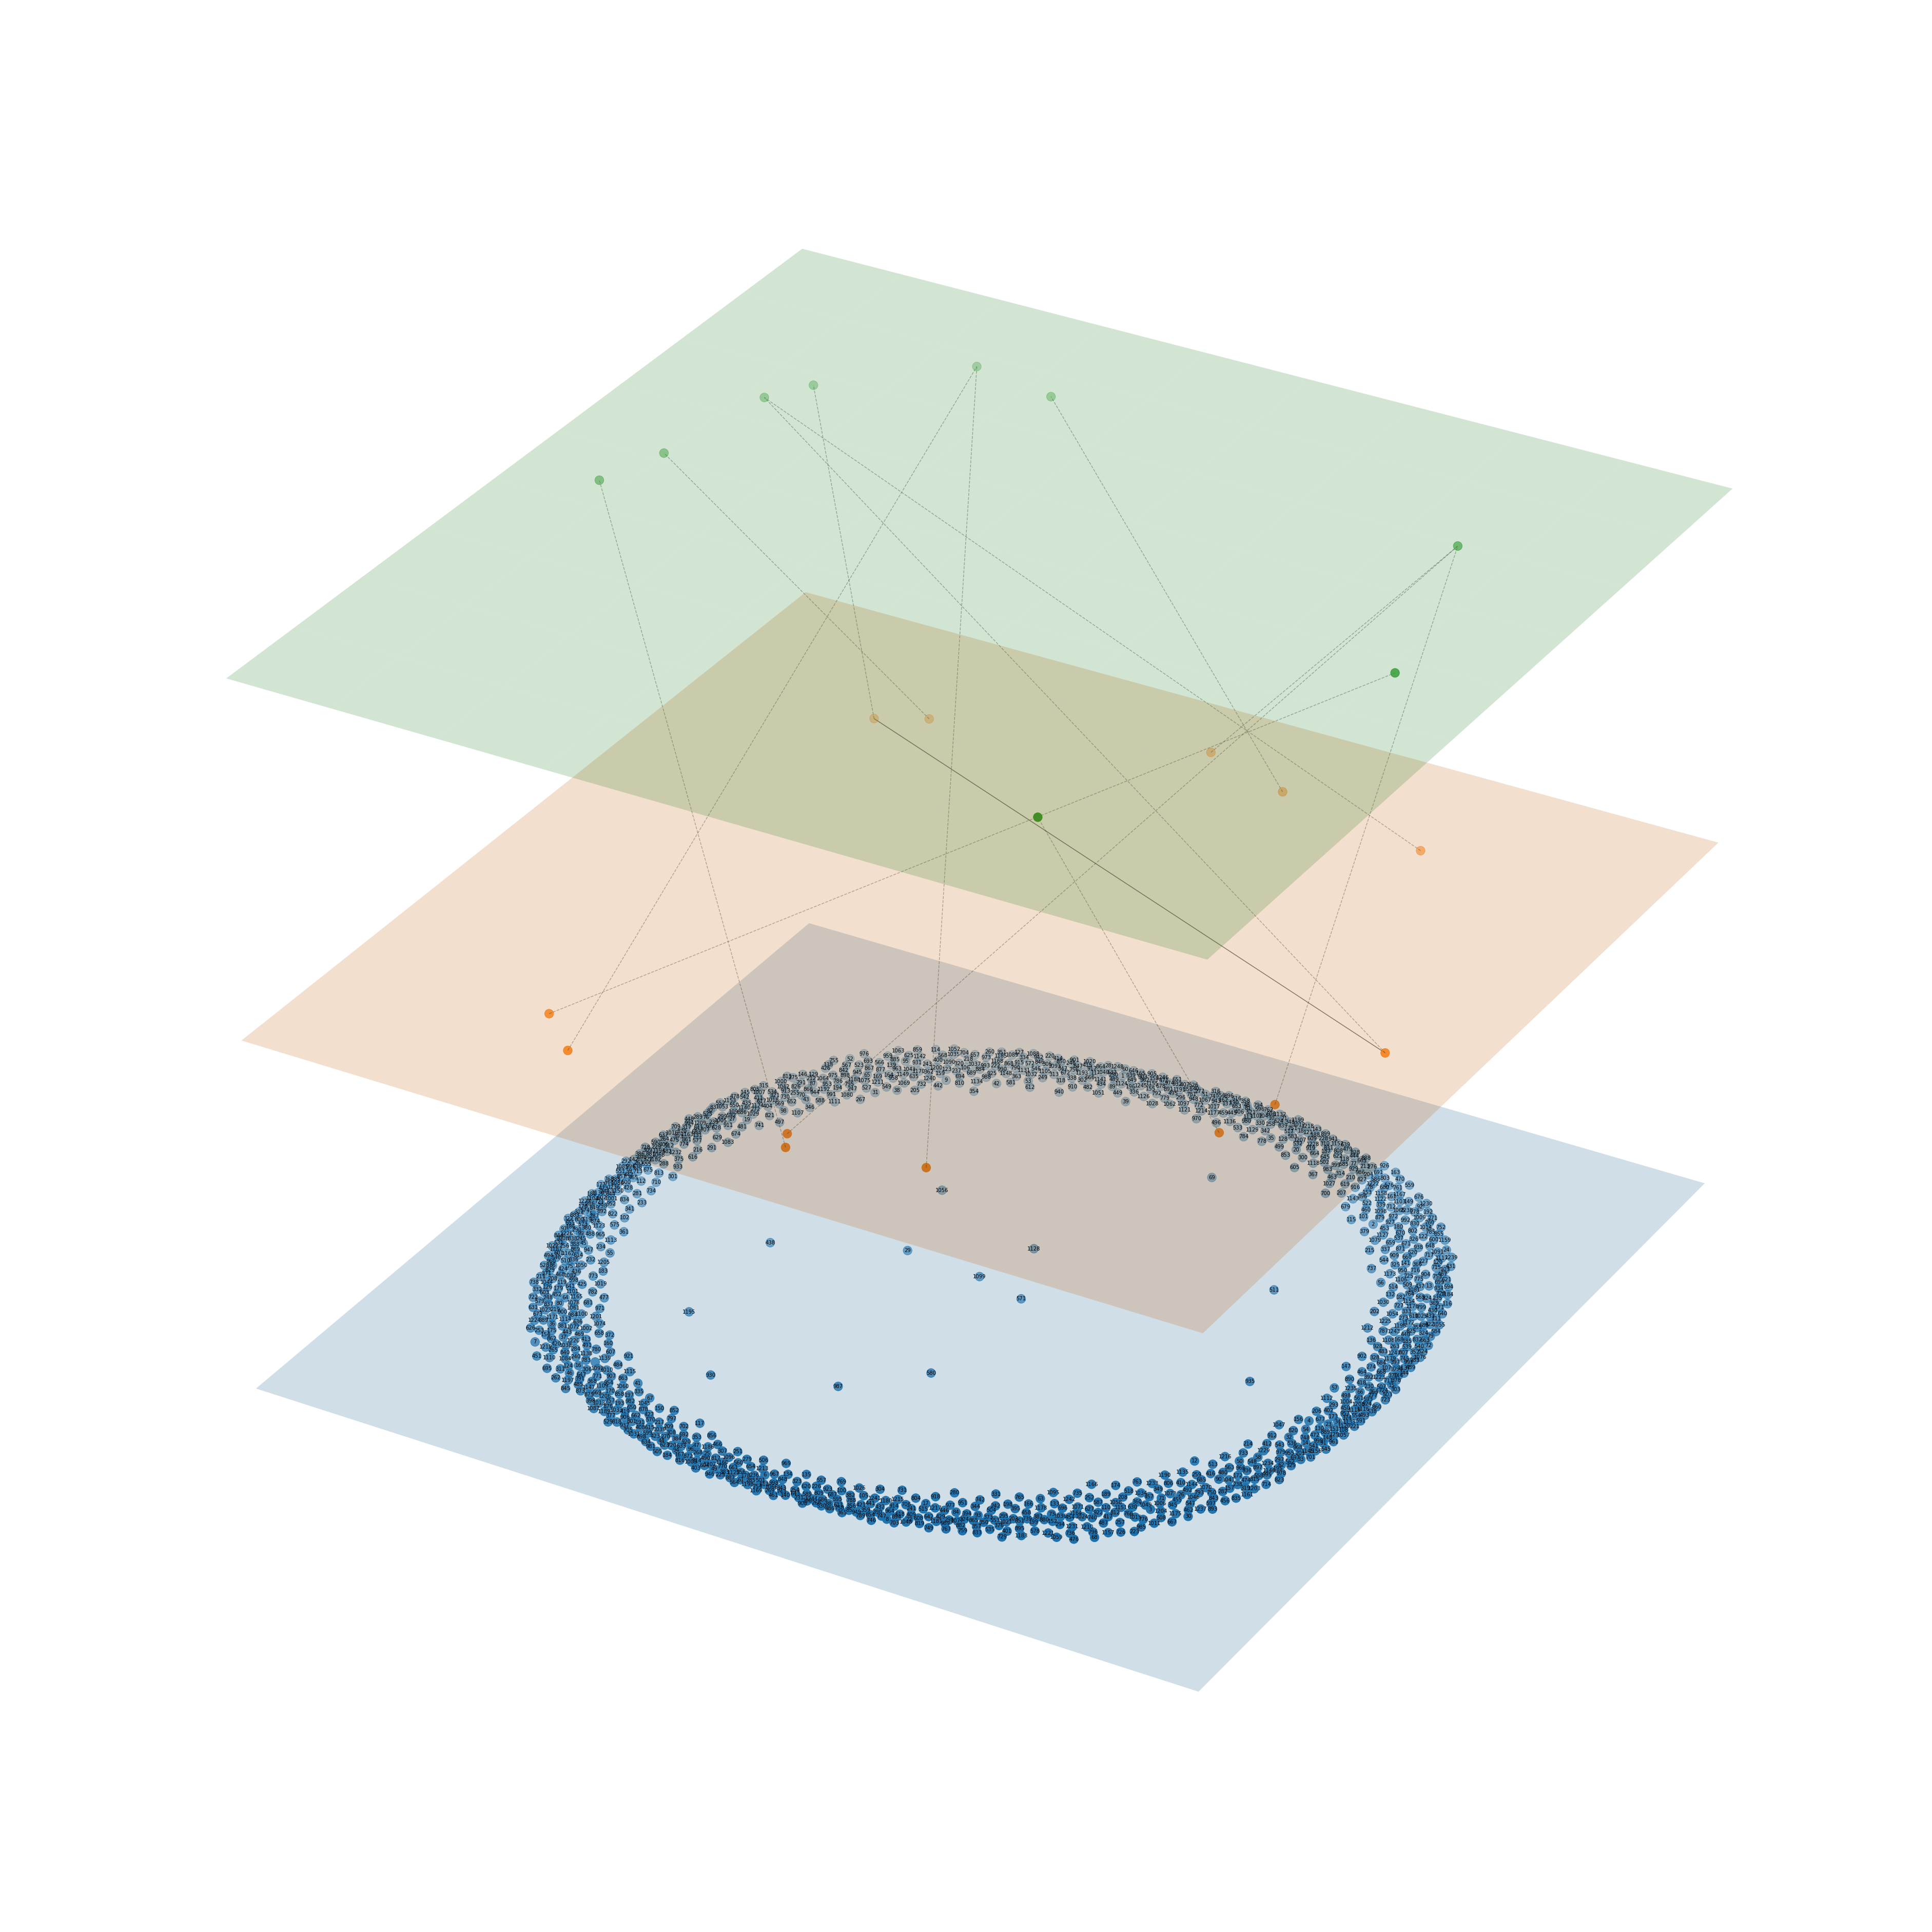

In [23]:
if __name__ == '__main__':
    node_labels = {nn : str(nn) for nn in range(max(len(paper_nx.nodes()),len(auth_nx.nodes())))}
    # initialise figure and plot
    fig = plt.figure(figsize = (696,69))
    ax = fig.add_subplot(111, projection='3d')
    LayeredNetworkGraph([auth_nx,paper_nx,year_nx],node_labels=node_labels, ax=ax, layout=nx.spring_layout)
    ax.set_axis_off()
    plt.show()

In [23]:
from pymnet import *

ModuleNotFoundError: No module named 'pymnet'